In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
transactions = pd.read_csv("../data/cleaned/transactions_cleaned.csv")
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

In [3]:
transactions

,transaction_id,user_id,transaction_date,amount,transaction_type,used_instant_transfer
0,2000001,100000.0,2025-08-30 08:04:50.974356,7.46,transfer,False
1,2000002,100001.0,2025-03-03 08:04:50.974356,43.31,transfer,False
2,2000003,100004.0,2025-08-21 08:04:50.974356,21.70,transfer,False
3,2000005,100004.0,2025-09-08 08:04:50.974356,6.15,transfer,False
4,2000006,100004.0,2025-06-30 08:04:50.974356,76.54,spend,False
...,...,...,...,...,...,...
5992,2005995,101998.0,2025-08-20 08:04:50.974356,22.19,transfer,False
5993,2005996,101998.0,2025-11-13 08:04:50.974356,39.51,spend,False
5994,2005997,101998.0,2025-11-13 08:04:50.974356,4.68,transfer,True
5995,2005998,101998.0,2025-10-27 08:04:50.974356,13.48,hold,False


In [5]:
# Total daily amount (as KPI)

daily_sum = transactions.groupby('transaction_date')['amount'].sum().reset_index()
daily_sum.rename(columns={'amount':'daily_total'}, inplace=True)

In [10]:
# Simple statistical anomaly detection (Z-score method)
daily_sum['z_score'] = np.abs(stats.zscore(daily_sum['daily_total']))
threshold = 2
daily_sum['is_anomaly'] = daily_sum['z_score'] > threshold

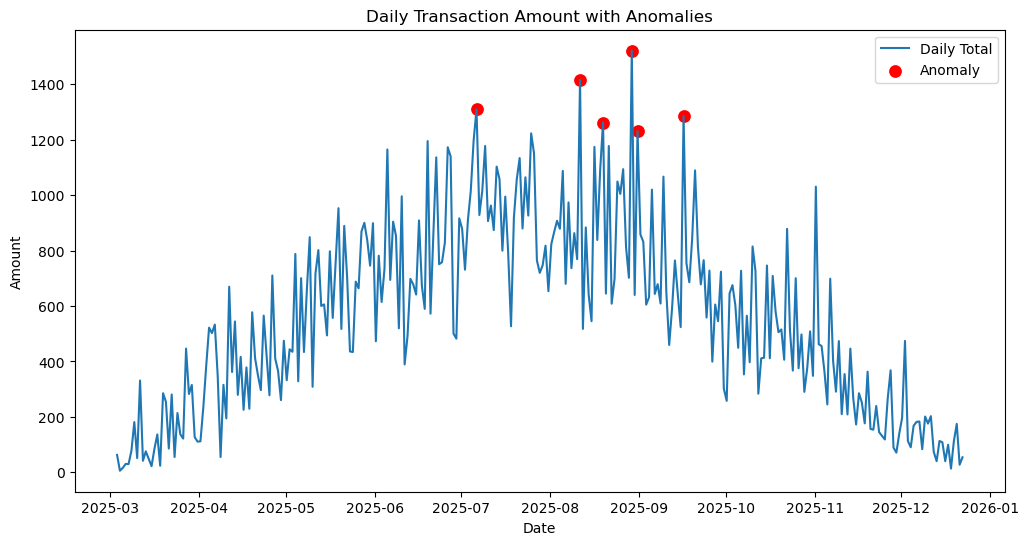

In [11]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_sum, x='transaction_date', y='daily_total', label='Daily Total')
sns.scatterplot(data=daily_sum[daily_sum['is_anomaly']], 
                x='transaction_date', y='daily_total', color='red', s=100, label='Anomaly')
plt.title("Daily Transaction Amount with Anomalies")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.show()

In [12]:
# Save anomalies
anomalies = daily_sum[daily_sum['is_anomaly']]
anomalies.to_csv("../data/anomalies_detected.csv", index=False)

print("Anomalies detected:", anomalies.shape[0])
anomalies.head()

Anomalies detected: 6


,transaction_date,daily_total,z_score,is_anomaly
124,2025-07-06 08:04:50.974356,1309.61,2.242445,True
160,2025-08-11 08:04:50.974356,1416.17,2.562129,True
168,2025-08-19 08:04:50.974356,1261.89,2.099283,True
178,2025-08-29 08:04:50.974356,1521.08,2.876863,True
180,2025-08-31 08:04:50.974356,1231.45,2.007962,True
